# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from dataclasses import dataclass, field
from typing import Callable, Union
from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')


# Data imputation
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

# Models
from sklearn.tree import DecisionTreeRegressor


# import Label encoding
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
# Change some pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("precision", 10)

# Data acquisition

In [4]:
# Read data
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

# Data preparation

In [6]:
df_train.shape

(1460, 81)

## Feature Modification

### Adding features

In [7]:
df_train['DateSold'] = df_train[['YrSold', 'MoSold']].astype(str).agg('-'.join, axis=1)
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']

### Changing data type

In [8]:
# Change some features to categorical 
cols = ['MSSubClass', 
        'BsmtFullBath', 
        'BsmtHalfBath', 
        'FullBath', 
        'HalfBath', 
        'BedroomAbvGr', 
        'KitchenAbvGr', 
        'TotRmsAbvGrd', 
        'Fireplaces',
        'GarageCars',
        '3SsnPorch',
        'MiscVal',
    ]
df_train[cols] = df_train[cols].astype('object')

df_train['OverallQual'] = df_train['OverallQual'].map({
                            10:	"Very Excellent",
                            9:	"Excellent",
                            8:	"Very Good",
                            7:	"Good",
                            6:	"Above Average",
                            5:	"Average",
                            4:	"Below Average",
                            3:	"Fair",
                            2:	"Poor",
                            1:	"Very Poor"
                        })


df_train['OverallCond'] = df_train['OverallCond'].map({
                            10:	"Very Excellent",
                            9:	"Excellent",
                            8:	"Very Good",
                            7:	"Good",
                            6:	"Above Average",
                            5:	"Average",
                            4:	"Below Average",
                            3:	"Fair",
                            2:	"Poor",
                            1:	"Very Poor"
                        })

categorical_feat = df_train.select_dtypes(include=['object']).columns
numerical_feat = df_train.select_dtypes(np.number).columns[1:]



In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Data validation
- Checking for wrong entries like symbols -,?,#,*,etc.

*Observation*:
- No strange values are found.

In [10]:
def get_values_count(data:pd.DataFrame) -> None:
    """
    Calculate the values count for each feature in the DataFrame
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    
    Returns
    -------
    values_count : DataFrame contains values count for each feature
    """
    print("--Value counts in each features--")
    for col in data.columns:
        val_cnts = data[col].value_counts(dropna=False).to_dict()
        if(len(val_cnts)>15):
            continue
        print(f"{col} :{val_cnts}")

def get_unique_values(data:pd.DataFrame):
    """
    Get unique values in each feature
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    
    Returns
    -------
    unique_values : DataFrame contains unique values for each feature
    """
    print("--Unique values in each features--")
    for col in data.columns:
        unique_values = data[col].unique()
        if(len(unique_values)>100):
            continue
        print(f"{col:<20}:{str(unique_values):^20}")
    

get_unique_values(df_train)


--Unique values in each features--
MSSubClass          :[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning            :['RL' 'RM' 'C (all)' 'FV' 'RH']
Street              :  ['Pave' 'Grvl']   
Alley               :[nan 'Grvl' 'Pave'] 
LotShape            :['Reg' 'IR1' 'IR2' 'IR3']
LandContour         :['Lvl' 'Bnk' 'Low' 'HLS']
Utilities           :['AllPub' 'NoSeWa'] 
LotConfig           :['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope           :['Gtl' 'Mod' 'Sev'] 
Neighborhood        :['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1          :['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2          :['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType            :['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  

# EDA

## Missing values checking
- There is a big percent of missing values in **PoolQC** & **MiscFeature** & **Alley** & **Fence**, as a result, we will remove them later.
- 

In [14]:
def check_missing_vals(data:pd.DataFrame, with_plot=True):
    """
    Check the presence of Null values in each feature
    
    Parameters
    ----------
    data : DataFrame
    """

    missings = pd.DataFrame()

    missing_vals = df_train.isnull().sum().sort_values(ascending=False)
    
    missing_vals = missing_vals[missing_vals!=0]

    missings.index = missing_vals.index
    missings['Values'] = missing_vals.values
    missings['Percentage'] = round(missings['Values'] / len(data), 3)
    missings['Type'] = data[missings.index].dtypes


    if(with_plot):
        # Plot heatmap of columns that include missing values
        f, ax = plt.subplots(figsize=(15, 12))
        ax = sns.heatmap(data.isnull()[missings.index], yticklabels=False, cbar=False, cmap='viridis')
        ax.set_title("Missing values")

    return missings
    
print(f"--Missing values count--\n")
check_missing_vals(df_train, with_plot=False)


--Missing values count--



Values  Percentage     Type
PoolQC          1453       0.995   object
MiscFeature     1406       0.963   object
Alley           1369       0.938   object
Fence           1179       0.808   object
FireplaceQu      690       0.473   object
LotFrontage      259       0.177  float64
GarageFinish      81       0.055   object
GarageCond        81       0.055   object
GarageYrBlt       81       0.055  float64
GarageQual        81       0.055   object
GarageType        81       0.055   object
BsmtExposure      38       0.026   object
BsmtFinType2      38       0.026   object
BsmtQual          37       0.025   object
BsmtCond          37       0.025   object
BsmtFinType1      37       0.025   object
MasVnrType         8       0.005   object
MasVnrArea         8       0.005  float64
Electrical         1       0.001   object

## Duplicates values checking

In [13]:
def check_duplicates(data:pd.DataFrame) -> list[pd.Index]:
    """Check the presence of duplicates value"""
    dup_indexes = data[data.duplicated()].index
    return dup_indexes

check_duplicates(df_train)

Int64Index([], dtype='int64')

## Statical analysis

### Numerical features

*Summary*:
- We noticing that there are many features have values equal to 0.


In [12]:
df_train.describe().T.round(1)

count      mean      std      min       25%       50%       75%       max
Id             1460.0     730.5    421.6      1.0     365.8     730.5    1095.2    1460.0
LotFrontage    1201.0      70.0     24.3     21.0      59.0      69.0      80.0     313.0
LotArea        1460.0   10516.8   9981.3   1300.0    7553.5    9478.5   11601.5  215245.0
YearBuilt      1460.0    1971.3     30.2   1872.0    1954.0    1973.0    2000.0    2010.0
YearRemodAdd   1460.0    1984.9     20.6   1950.0    1967.0    1994.0    2004.0    2010.0
MasVnrArea     1452.0     103.7    181.1      0.0       0.0       0.0     166.0    1600.0
BsmtFinSF1     1460.0     443.6    456.1      0.0       0.0     383.5     712.2    5644.0
BsmtFinSF2     1460.0      46.5    161.3      0.0       0.0       0.0       0.0    1474.0
BsmtUnfSF      1460.0     567.2    441.9      0.0     223.0     477.5     808.0    2336.0
TotalBsmtSF    1460.0    1057.4    438.7      0.0     795.8     991.5    1298.2    6110.0
1stFlrSF       1460.0    1162.6    386.6    334.0     882.0    1087.0    1391.2    4692.0
2ndFlrSF       1460.0     347.0    436.5      0.0       0.0       0.0     728.0    2065.0
LowQualFinSF   1460.0       5.8     48.6      0.0       0.0       0.0       0.0     572.0
GrLivArea      1460.0    1515.5    525.5    334.0    1129.5    1464.0    1776.8    5642.0
GarageYrBlt    1379.0    1978.5     24.7   1900.0    1961.0    1980.0    2002.0    2010.0
GarageArea     1460.0     473.0    213.8      0.0     334.5     480.0     576.0    1418.0
WoodDeckSF     1460.0      94.2    125.3      0.0       0.0       0.0     168.0     857.0
OpenPorchSF    1460.0      46.7     66.3      0.0       0.0      25.0      68.0     547.0
EnclosedPorch  1460.0      22.0     61.1      0.0       0.0       0.0       0.0     552.0
ScreenPorch    1460.0      15.1     55.8      0.0       0.0       0.0       0.0     480.0
PoolArea       1460.0       2.8     40.2      0.0       0.0       0.0       0.0     738.0
MoSold         1460.0       6.3      2.7      1.0       5.0       6.0       8.0      12.0
YrSold         1460.0    2007.8      1.3   2006.0    2007.0    2008.0    2009.0    2010.0
SalePrice      1460.0  180921.2  79442.5  34900.0  129975.0  163000.0  214000.0  755000.0
HouseAge       1460.0      36.5     30.3      0.0       8.0      35.0      54.0     136.0

### Categorical features

In [13]:
df_train.describe(include=['O']).T

count unique      top  freq
MSSubClass     1460     15       20   536
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
OverallQual    1460     10  Average   397
OverallCond    1460      9  Average   821
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
BsmtFullBath   1460      4        0   856
BsmtHalfBath   1460      3        0  1378
FullBath       1460      4        2   768
HalfBath       1460      3        0   913
BedroomAbvGr   1460      8        3   804
KitchenAbvGr   1460      4        1  1392
KitchenQual    1460      4       TA   735
TotRmsAbvGrd   1460     12        6   402
Functional     1460      7      Typ  1360
Fireplaces     1460      4        0   690
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageCars     1460      5        2   824
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
3SsnPorch      1460     20        0  1436
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
MiscVal        1460     21        0  1408
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198
DateSold       1460     55   2006-7    67

## Univariate analysis

### Numerical variables

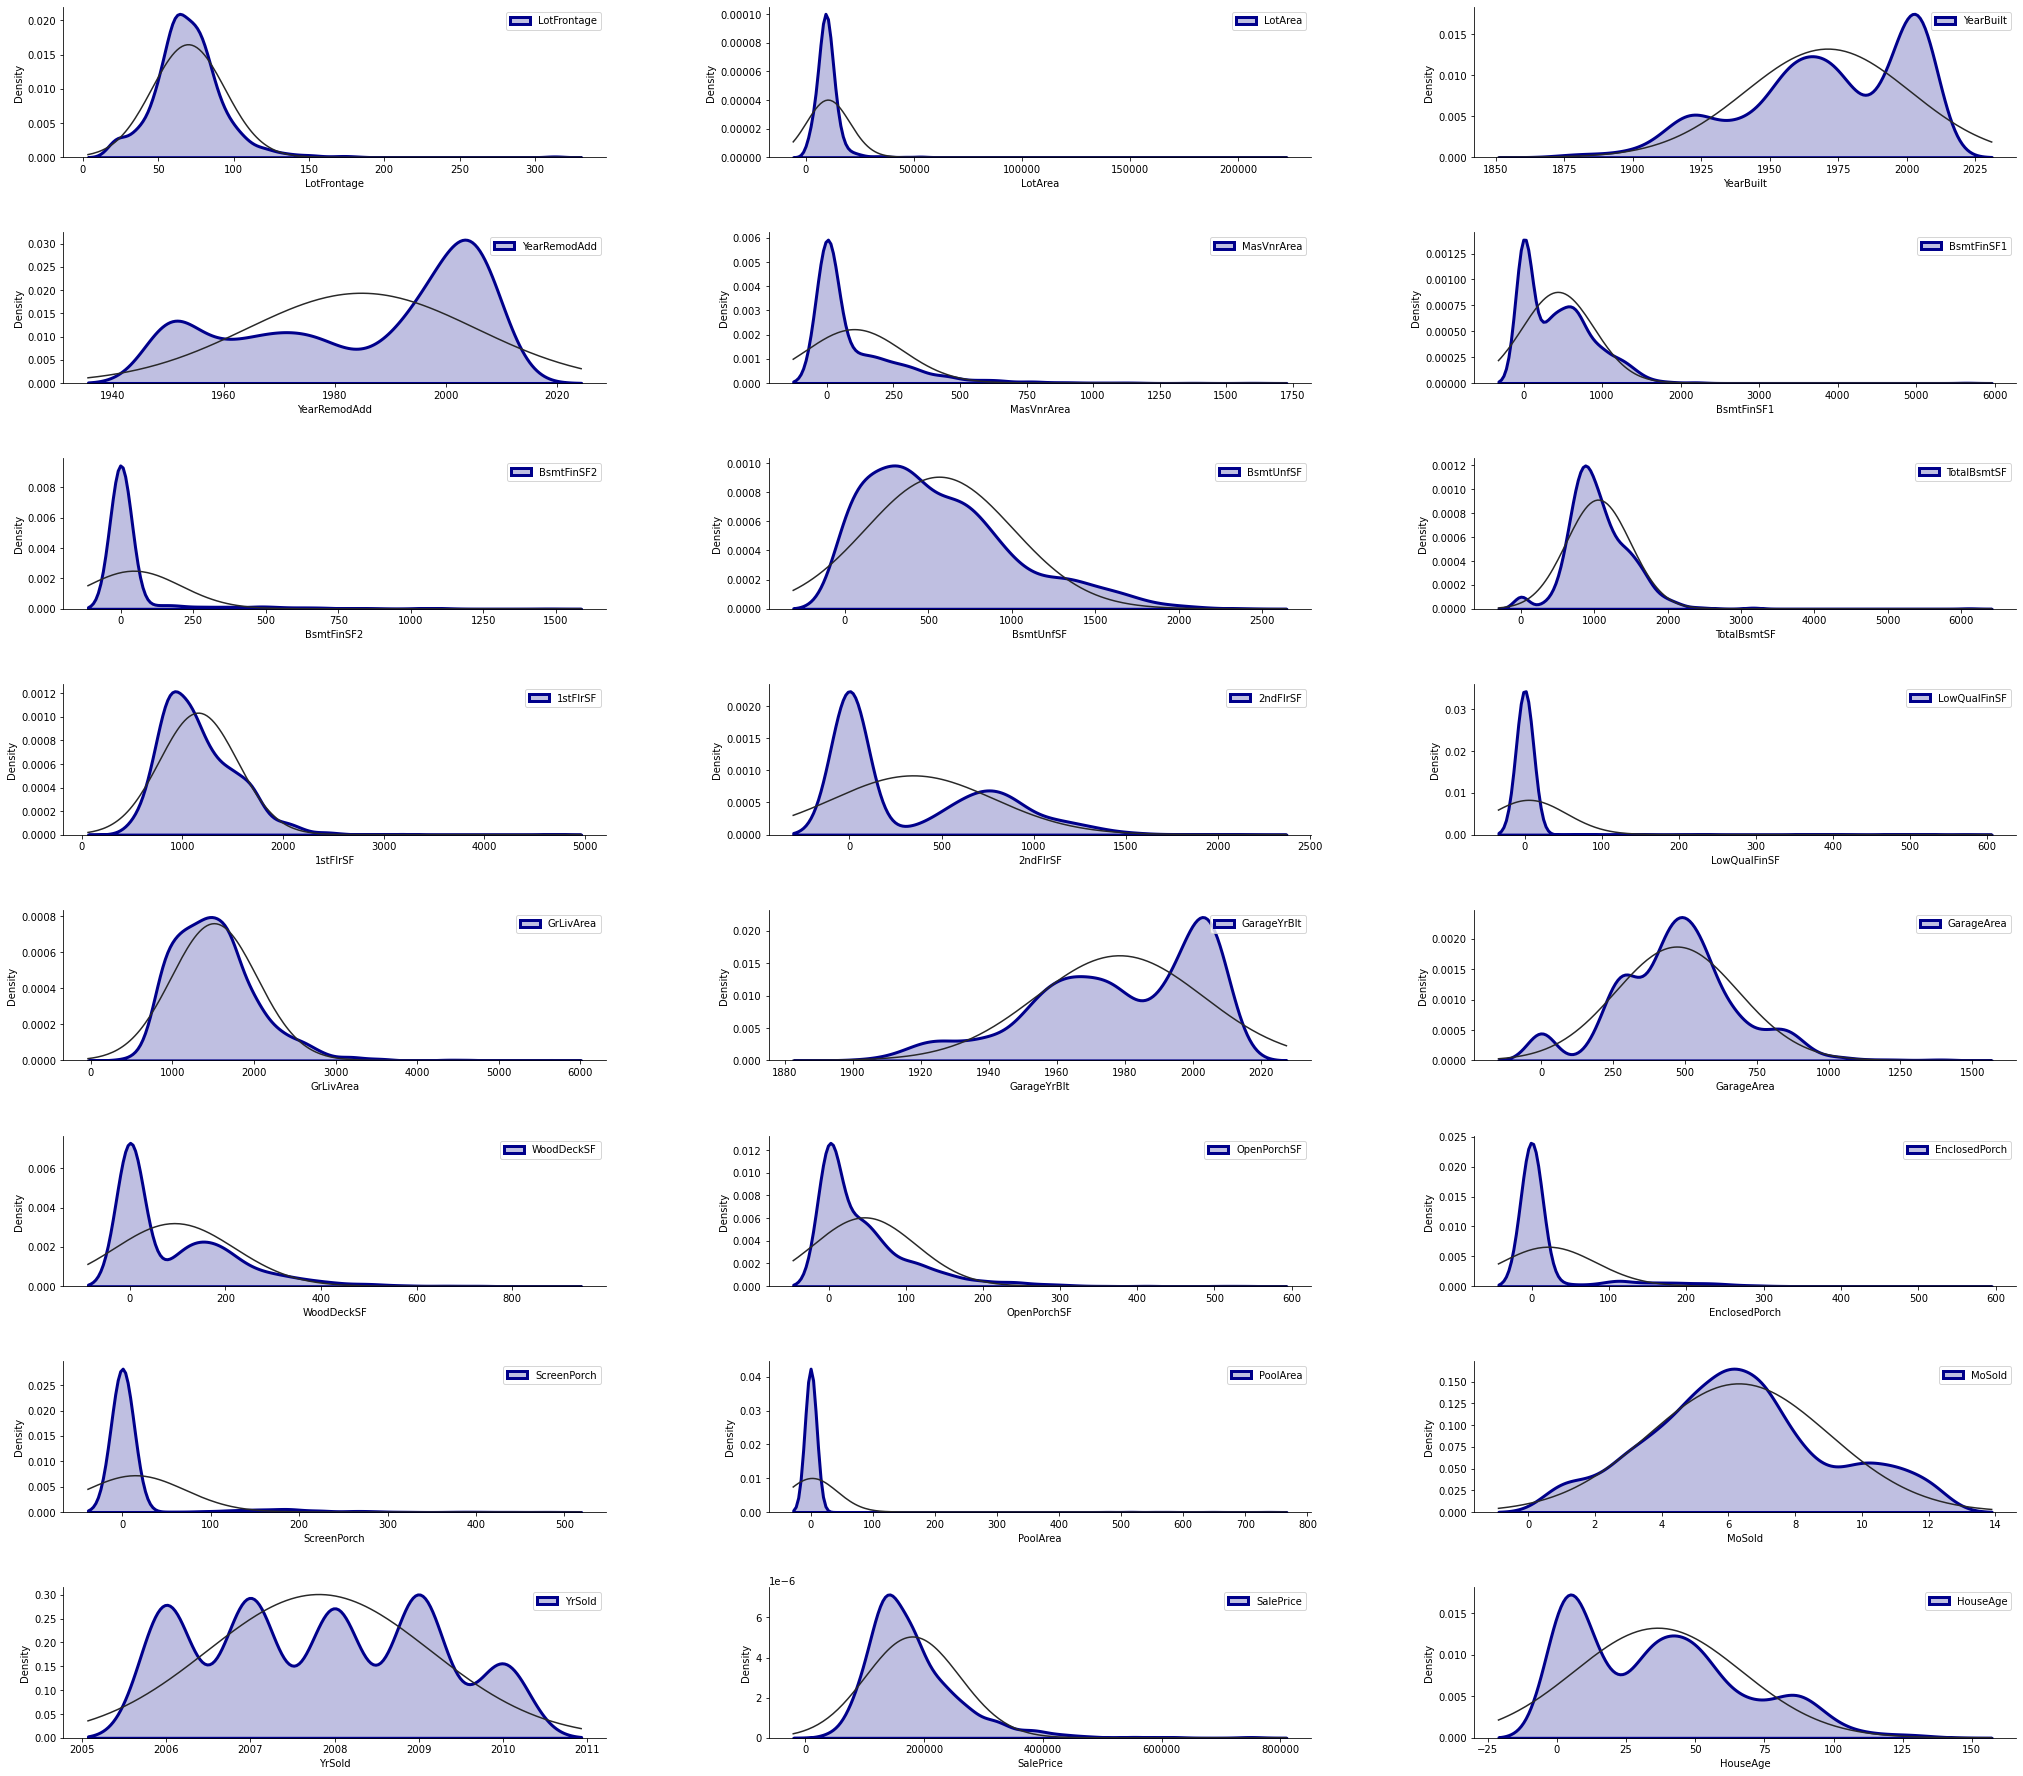

In [14]:
# plot the kde of numerical features
def plot_kde(data:pd.DataFrame):
    """
    Plot the kde of numerical features
        
    Parameters
    ----------
    data : DataFrame
    """

    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)
    

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.distplot(data[col], fit=stats.norm, hist=False, kde=True, 
                     kde_kws={'linewidth': 3, 'shade': True, 'color': 'darkblue'}, 
                     label=col, ax=ax)       

        sns.despine()
        plt.legend()

plot_kde(df_train[numerical_feat])


### Categorical variables

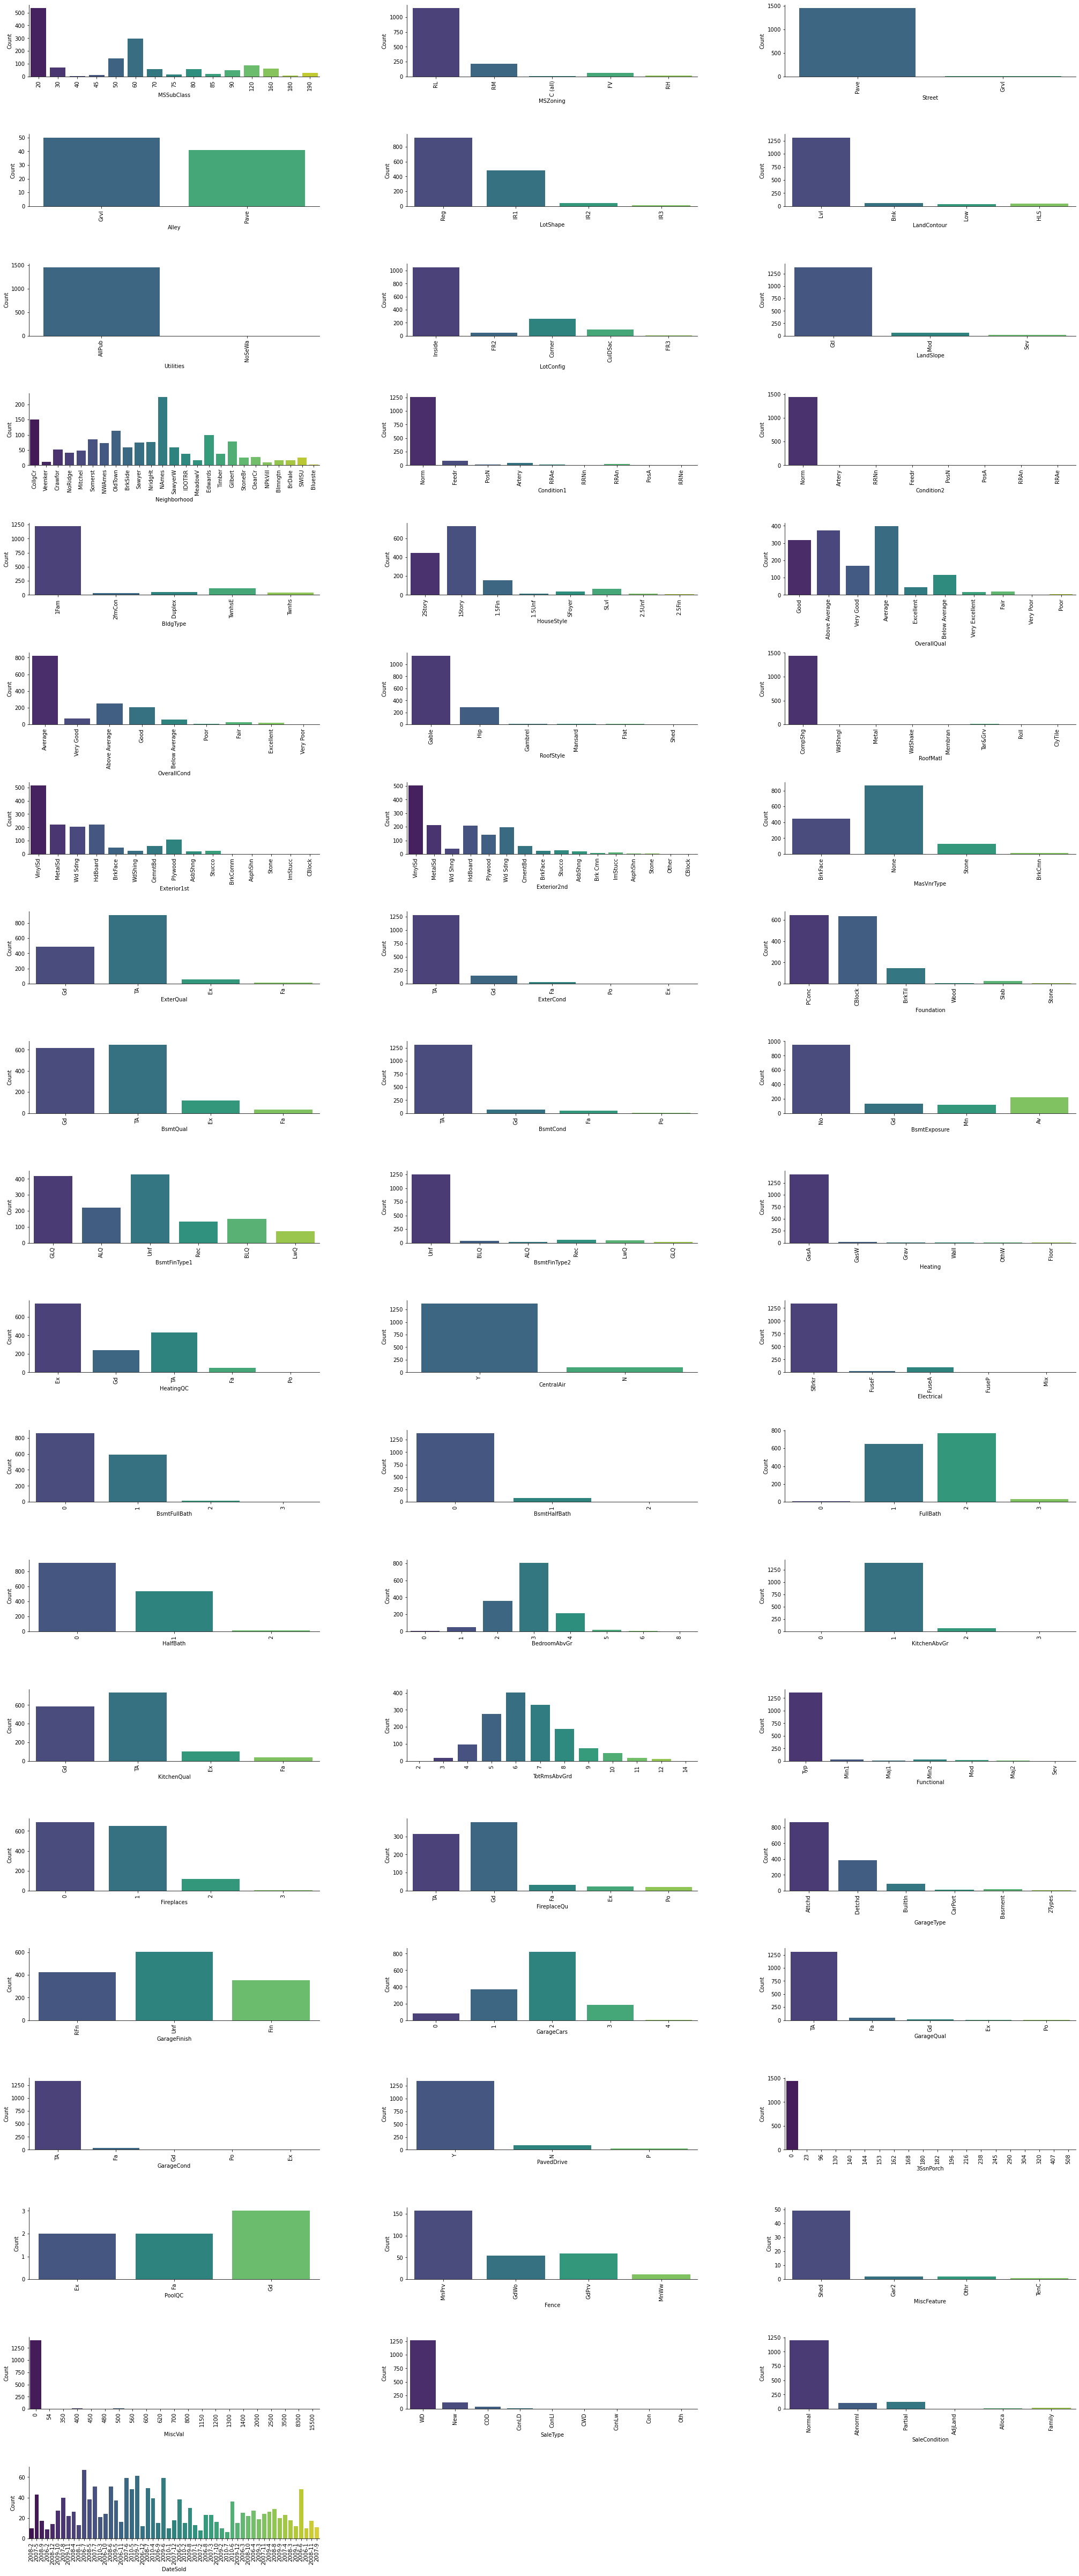

In [15]:
# plot countplot for categorical features
def plot_count_plot(data:pd.DataFrame):
    """
    Plot countplot for categorical features
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    """
    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.8)

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.countplot(x=col, data=data, ax=ax, palette='viridis')
        sns.despine()
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        

plot_count_plot(df_train[categorical_feat])

## Bivariate analysis

### Target - numerical vars

*In Summary:*

The most contributed numerical features in predicting the **SalePrice** are:
- TotalBsmtSF
- 2stFlrSF
- GrLivArea
- GarageArea

#### Scatter plot

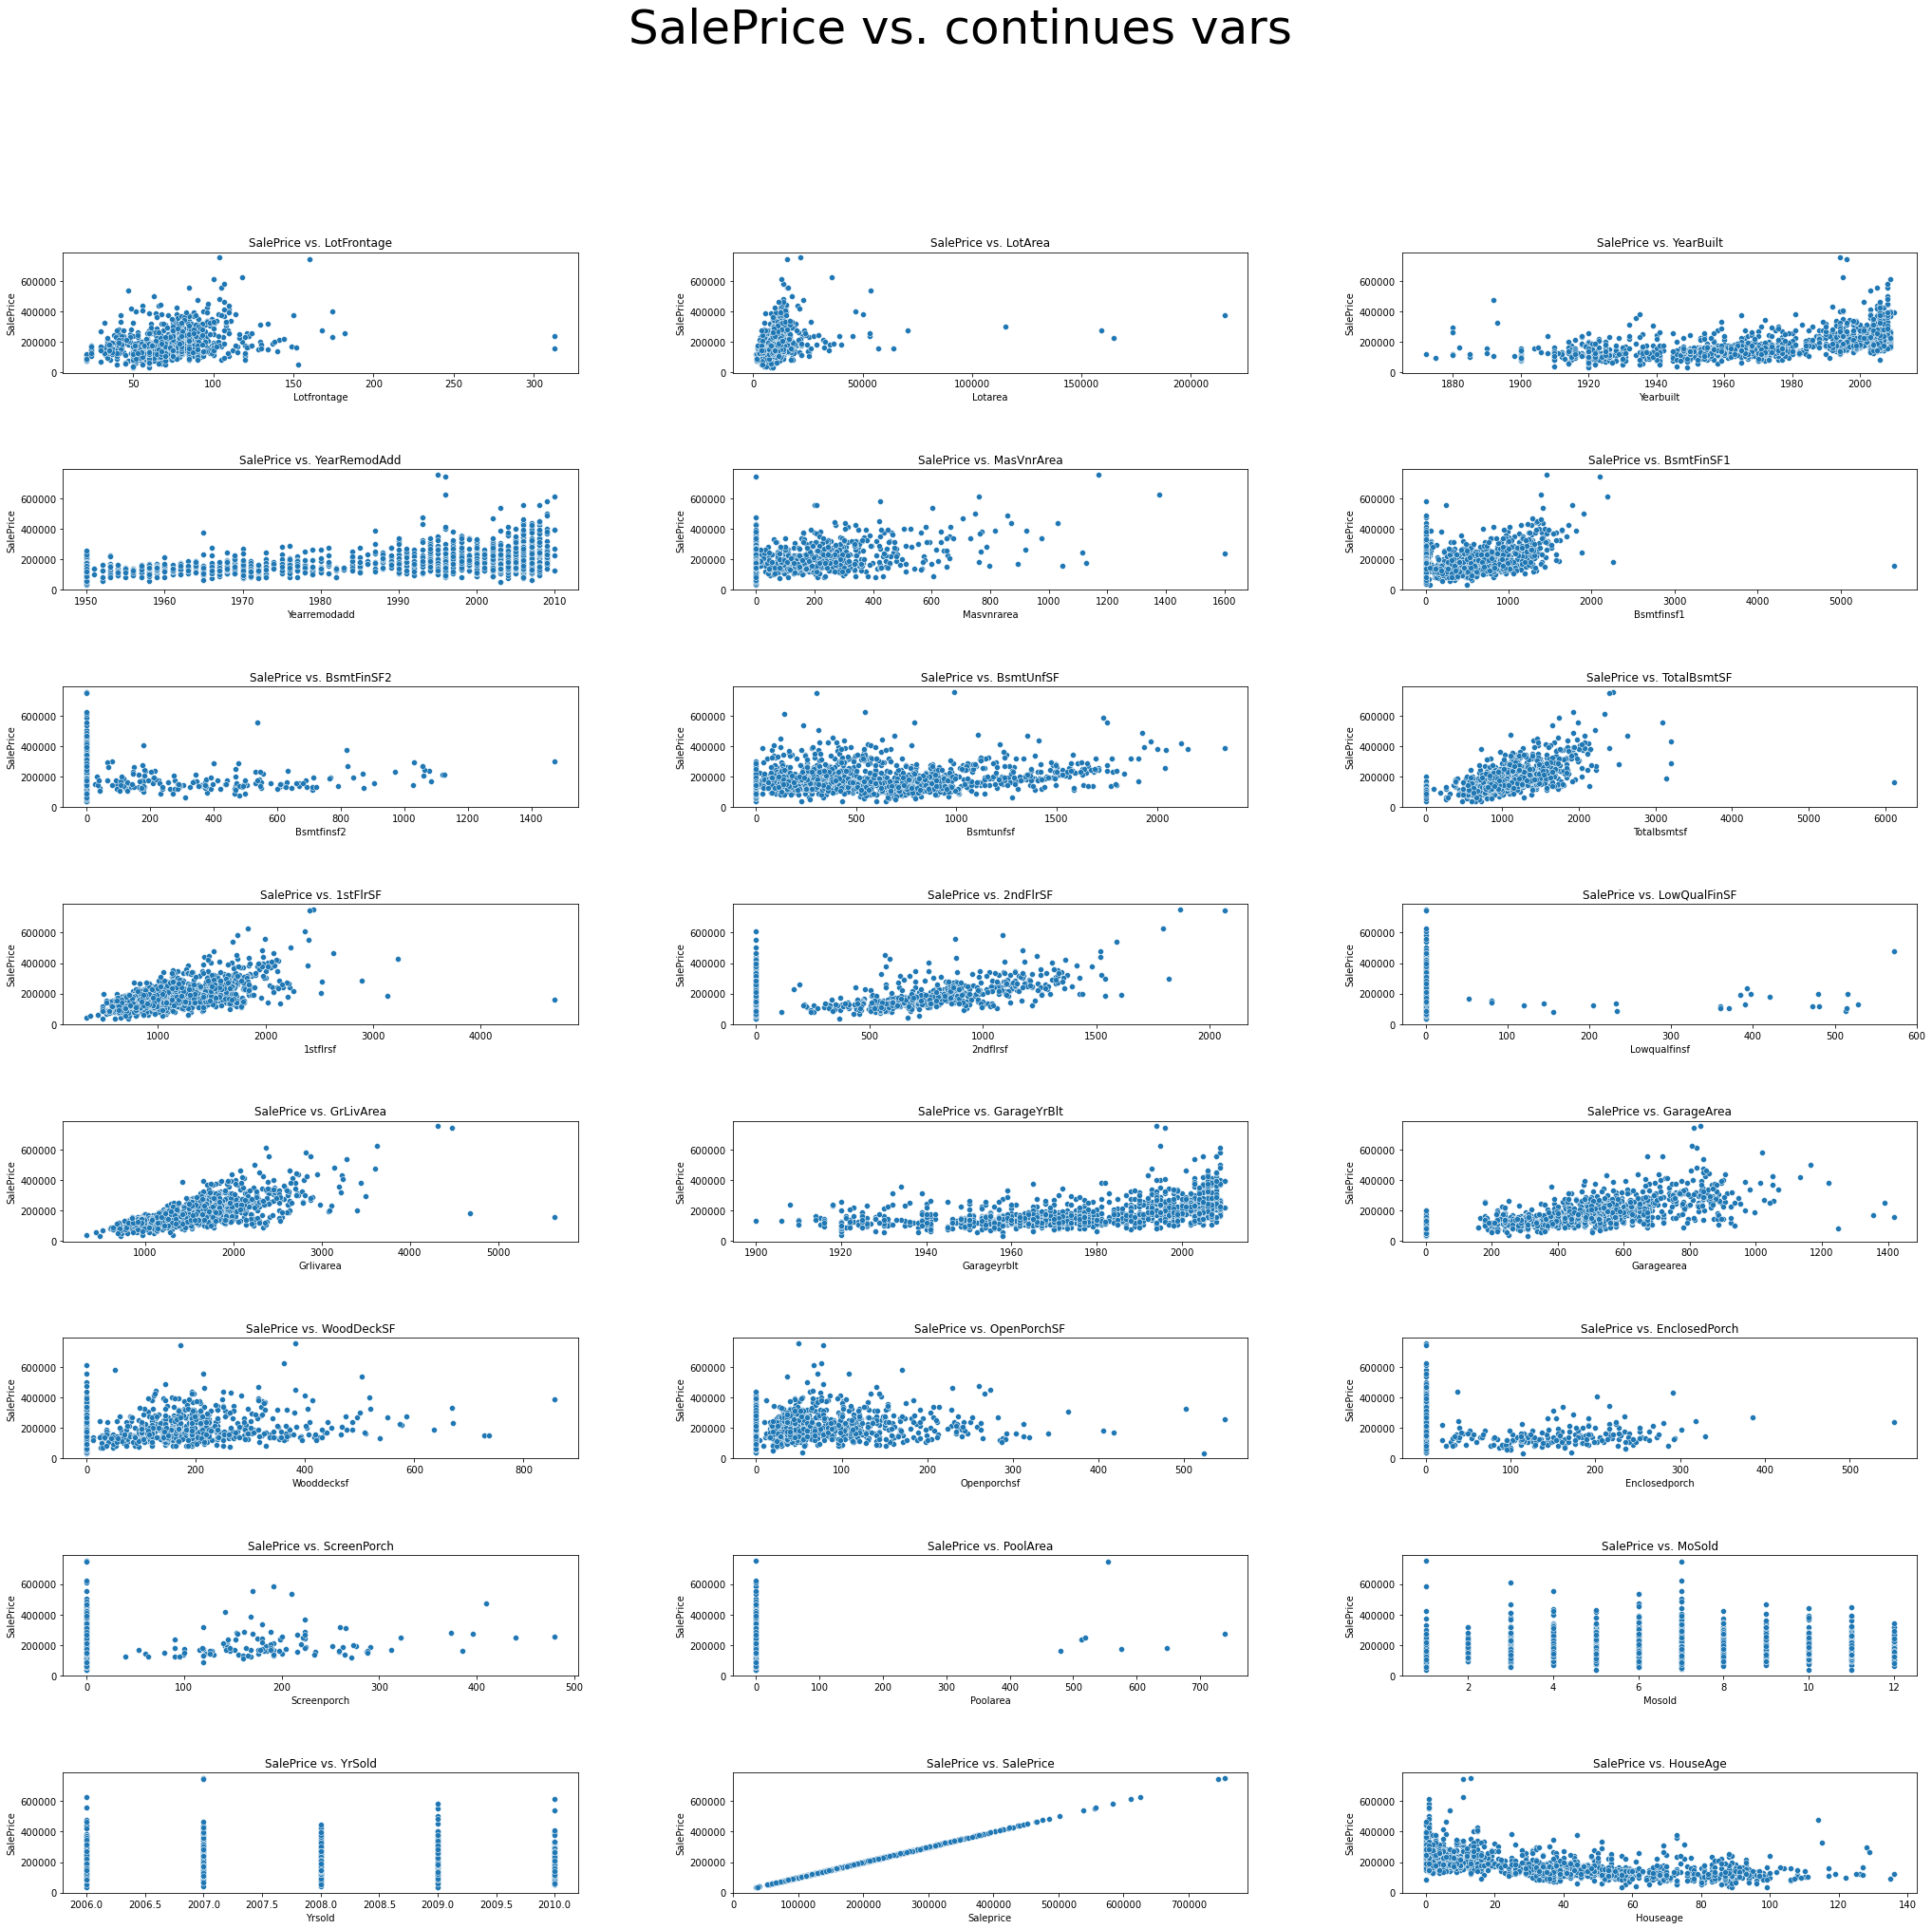

In [16]:
def plot_scatter_plot(data:pd.DataFrame, cols:list, comp_var:str, title:str):
    """
    Plot scatter plot between the comparison variable and continues variables
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    comp_var: str
    title: str
    """
    figure = plt.figure(figsize=(35, int(len(cols)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.8)

    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(len(cols)//3 + 1, 3, i)
        sns.scatterplot(x=col, y=comp_var, data=data, ax=ax)
        ax.set_title(f'{comp_var} vs. {col}')
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel(comp_var)

    figure.suptitle(title, fontsize=50)

plot_scatter_plot(data=df_train, cols=numerical_feat, comp_var='SalePrice', title='SalePrice vs. continues vars')

#### Correlation matrix
Based on the **univariate analysis**, spearman correlation coefficient is the best way to check the correlation between the variables because the data is not normally distributed.


From the correlation matrix, the pairs of features with high correlation are:
- YearBuilt: {GarageYrBlt: 0.891, HouseAge: -0.98},
- YearRemodAdd: {GarageYrBlt: 0.72},
- TotalBsmtSF: {1stFlrSF: 0.82},
- GrLivArea: {SalePrice: 0.73},

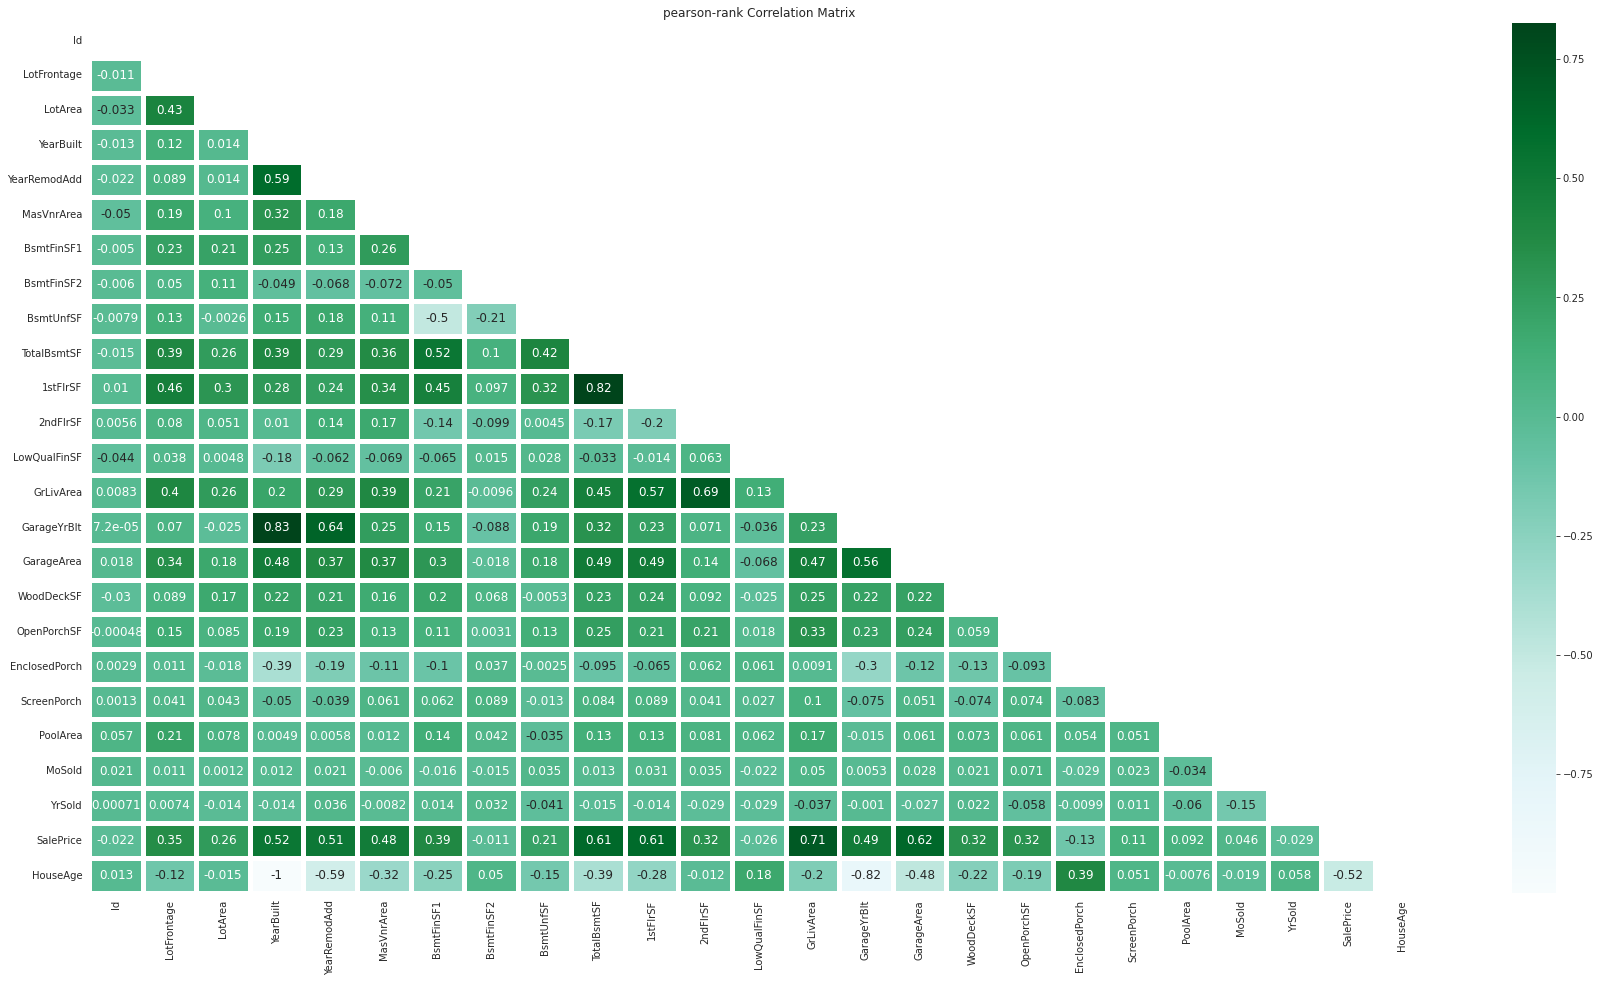

In [13]:
# Find the spearman correlation between features

def plot_corr_mat(data:pd.DataFrame, method='spearman'):
    corr_mat = data.corr(method=method) # corr method take only numeric vars


    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("whitegrid"): # white, dark, whitegrid, darkgrid, ticks
        f, ax = plt.subplots(figsize=(30, 16))
        ax = sns.heatmap(data=corr_mat, mask=mask, annot=True, annot_kws={'size':12}, linewidths=5, cmap=plt.cm.BuGn)
        ax.set_title(f'{method}-rank Correlation Matrix')

    return corr_mat

corr_mat = plot_corr_mat(data=df_train, method='pearson')

In [86]:
def find_corr_feat(corr_mat:pd.DataFrame,  threshold:float) -> pd.DataFrame:
    """
    Find correlated features that have correlation value bigger than the threshold
        
        Parameters
        ----------
        data : DataFrame
        threshold : float
        
        Returns
        -------
        correlated_feat : DataFrame contains correlated features
    """

    # Create dictionary holds correlation features
    correlated_features = defaultdict(dict)

    # we search for correlated values in triangular shape
    for col_ind, col_name in enumerate(corr_mat.columns):
        for row_ind in range(col_ind):
            corr_val = round(abs(corr_mat.iloc[row_ind, col_ind]), 3)
            if(corr_val < threshold):
                continue
            correlated_features[col_name][corr_mat.index[row_ind]] = corr_val
        
    return correlated_features

print("The most correlate features are:\n ", find_corr_feat(corr_mat, 0.65))


The most correlate features are:
  defaultdict(<class 'dict'>, {'1stFlrSF': {'TotalBsmtSF': 0.82}, 'GrLivArea': {'2ndFlrSF': 0.688}, 'GarageYrBlt': {'YearBuilt': 0.826}, 'SalePrice': {'GrLivArea': 0.709}, 'HouseAge': {'YearBuilt': 0.999, 'GarageYrBlt': 0.825}})


#### Multicollinearity Detecting
Variable Inflation Factors (VIF):
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In conclusion, sqft_living15 & sqft_lot15 could be predicted by other variables so we can delete them.

In [ ]:
def check_multi_collinearity(data:pd.DataFrame):
    """
    Check if there is multi collinearity between features
    
    Notes:
    --------
    This process needs data to not contain missing values
    """

    vif = pd.DataFrame()
    vif.index = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif["Correlated to target"] = data['SalePrice']
    vif = vif.sort_values(by='Correlated to target', ascending=False)

    return vif

check_multi_collinearity(df_train[numerical_feat])

### Target - categorical vars
*In Summary:*

The most contributed categorical features in predicting the **SalePrice** are:
- Neighborhood
- Condition2
- OverallQual
- OverallCond
- RoofMatl
- Exterior2nd
- ExtraQual
- BsmtQual
- BsmtCond
- HeatingQC
- FullBath
- KitchenQuall
- TotRmsAbvGrd
- FireplaceQu
- GarageType
- GarageCars
- PoolQC

#### Bar plot \w mean

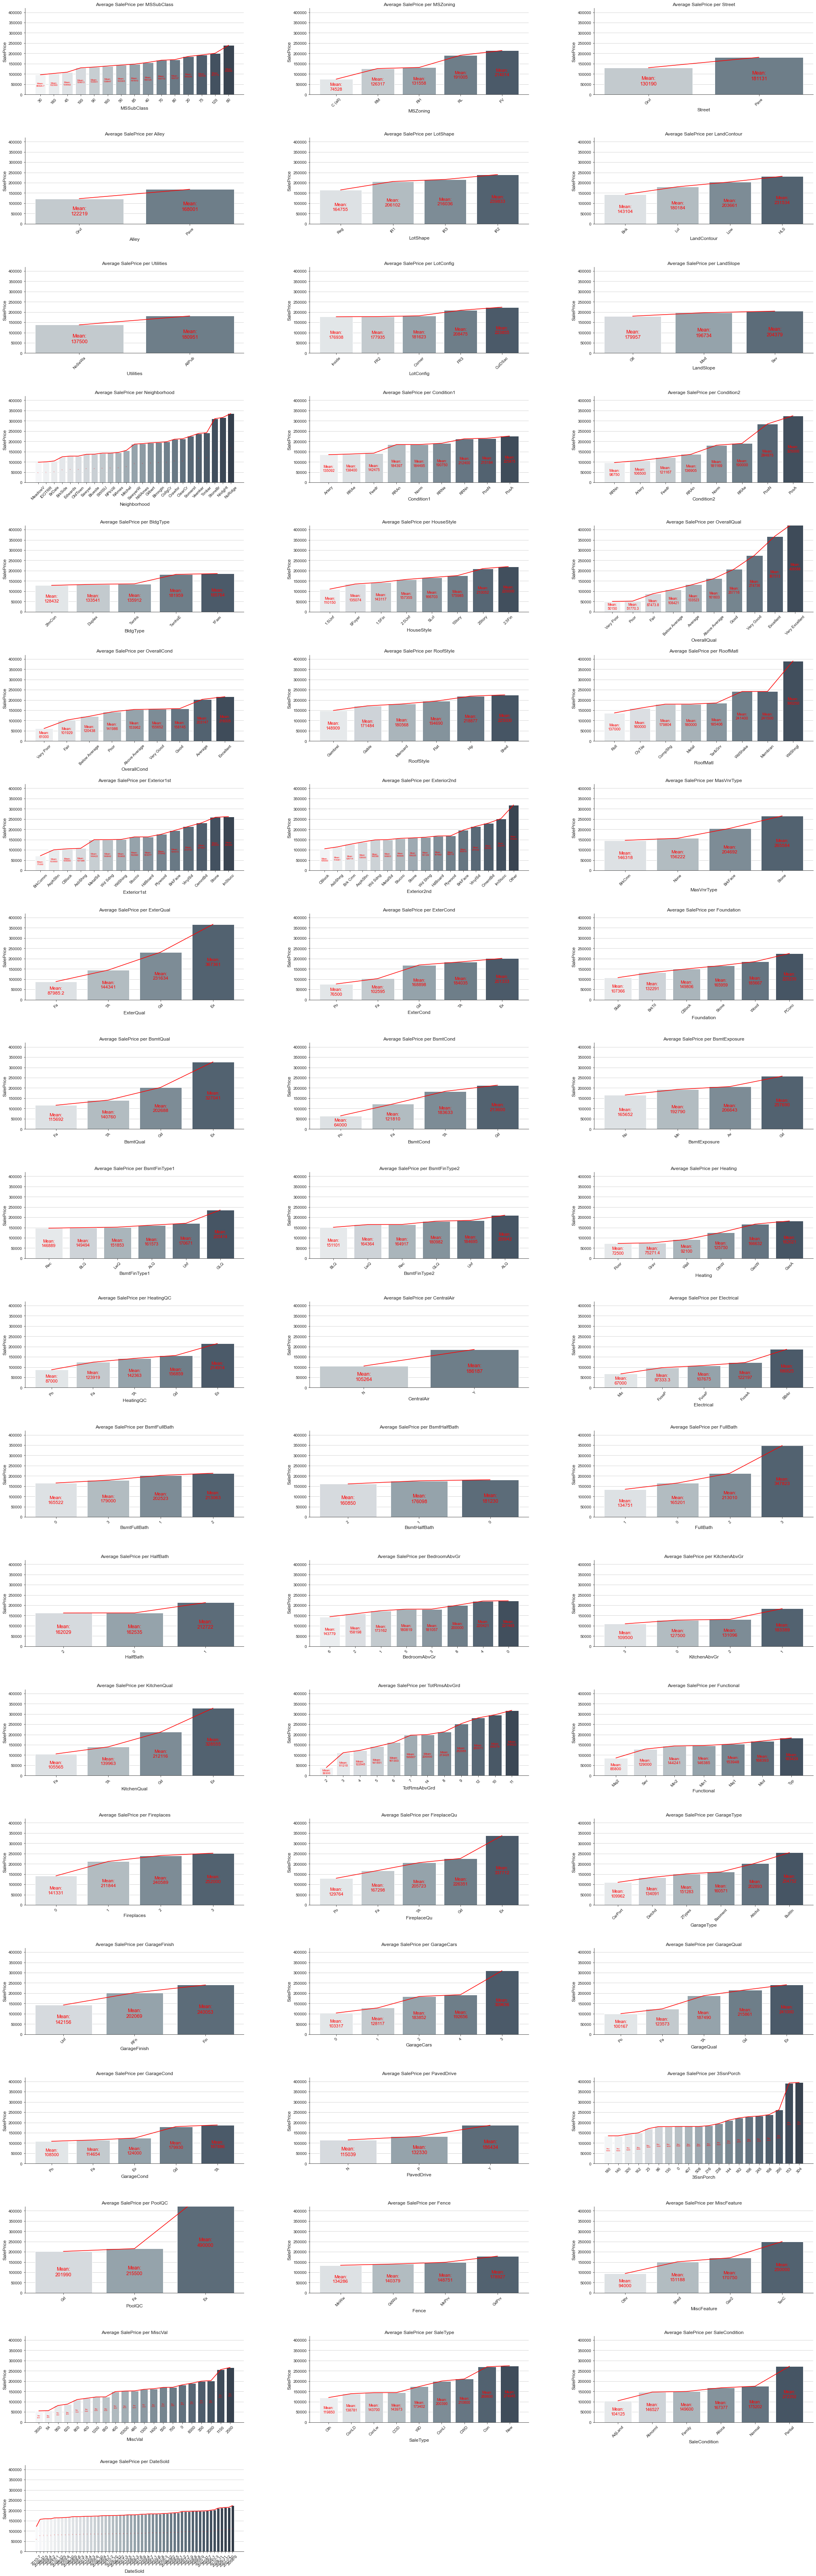

In [ ]:
def plot_mean_count_plot(data:pd.DataFrame, cols:list, comp_var:str, title:str):
    """
    Plot mean of comparison variable grouped by categorical features as scatter plot
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    comp_var : str
    """
    # figure, axs = plt.subplots(nrows=len(cols), ncols=1, figsize=(15, len(cols)*9))

    figure = plt.figure(figsize=(35, int(len(cols)*2)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)

    # for i, col in enumerate(cols):

    # plot the bar of categorical variables
    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(len(cols)//3 + 1, 3, i)

        # Groupe data by comp_var and calculate the mean value
        # Get median value for each category column
        df_means = data.groupby(col).mean()[comp_var].to_frame()

        # Make index values as column
        df_means[col] = df_means.index
        
        # Change mean value column name
        df_means.rename(columns={comp_var:"Means"}, inplace=True)

        # Reset the index
        df_means.reset_index(drop=True, inplace=True)

        df_means = df_means.sort_values(by='Means')

        # Change type of the category column to string
        df_means[col] = df_means[col].astype(str)

        


        bar_axs = sns.barplot(x=col, y='Means', data=df_means, order=df_means[col], palette="Blues", saturation=0.2, ci=None, ax=ax)
        sns.lineplot(x=col, y='Means', data=df_means, color='red', ax=ax)

        # Adjust labels size to the number of x-ticks and x-lim
        lbl_font_size = -22.4*ax.get_xlim()[1] + 23*len(ax.get_xticks())

        # Label each bar by its value
        ax.bar_label(bar_axs.containers[-1], label_type='center', fmt="Mean:\n%g", fontsize=lbl_font_size, color='red')
        ax.set_title(f"Average {comp_var} per {col}")
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel(comp_var, fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim([0, 420_000])
        sns.set_style("ticks", {'axes.grid' : True})

        sns.despine()

    # figure.suptitle(title, fontsize=50)

plot_mean_count_plot(data=df_train, cols=categorical_feat, comp_var= 'SalePrice', title='Mean price per category')

#### Box-whisker \w mean

In [184]:
def calc_agg(data:pd.DataFrame, col:str, comp_var:str, agg_val:str):

    # Groupe data by comp_var and calculate the median value
    # Get median value for each category column
    # df_medians = data.groupby(col).median()[comp_var].to_frame()
    df_medians = data.groupby(col).agg(agg_val)[comp_var].to_frame()

    # Make index values as column
    df_medians[col] = df_medians.index

    # Change median value column name
    df_medians.rename(columns={comp_var:'Median'}, inplace=True)
    
    # Reset the index
    df_medians.reset_index(drop=True, inplace=True)

    # Change type of the category column to string
    df_medians[col] = df_medians[col].astype(str)

    # Sort dateframe by value of category column
    df_medians[col] = df_medians[col].sort_values().values.tolist()

    return df_medians


def plot_mean_box_plot(data:pd.DataFrame, cols:list, comp_var:str, title:str):
    """
    Plot mean of comparison variable grouped by categorical features as scatter plot
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    comp_var : str
    """

    figure, axs = plt.subplots(nrows=len(cols), ncols=2, figsize=(35, len(cols)*9))
    axs = np.reshape(axs, (-1, 2))
    print(axs)

    figure.subplots_adjust(wspace=0.3, hspace=0.3)

    for i, col in enumerate(cols):
        
        df_medians = calc_agg(data=data, col=col, comp_var=comp_var, agg_val='median')

        # Draw box-whisker plot 
        box_plot = sns.boxplot(x=col, y=comp_var, order=df_medians[col], data=data, palette='viridis', ax=axs[i][0])

        # Put text on the median line
        for xtick in box_plot.get_xticks():
            box_plot.text(x=xtick, y=df_medians.loc[xtick, 'Median']+0.2, s=str(df_medians.loc[xtick, 'Median']), 
                    horizontalalignment='center',size='x-small',color='w',weight='semibold')

        axs[i][0].set_title(f'{comp_var} vs. {col}')
        axs[i][0].set_ylabel(comp_var)


        # Draw points that represent median value in each category
        sns.scatterplot(x=col, y='Median', data=df_medians, s=150, color='red', ax=axs[i][1])

        # Draw trend line that represent 
        sns.lineplot(x=col, y='Median', data=df_medians, size=9, ax=axs[i][1])

        
        # Put text on the median points
        for point_x, point_y in zip(df_medians[col].to_list(), df_medians['Median'].to_list()):
            axs[i][1].text(point_x, point_y, str(round(point_y,2)), horizontalalignment='left', size='medium', color='black', weight='semibold')

        axs[i][1].set_title(f"{comp_var}'s median per {col}")
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel(comp_var, fontsize=12)
        axs[i][1].set_xticklabels(df_medians[col])
        axs[i][1].set_ylim(axs[i][0].get_ylim())
        
        sns.despine()

    # figure.suptitle(title, fontsize=50)

plot_mean_box_plot(data=df_train, cols=categorical_feat[0:3].to_list(), comp_var= 'SalePrice', title='Mean price per category')

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


ValueError: Image size of 2040x87738234 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2520x1944 with 6 Axes>

### Binning
After preprocessing and creating new columns. The new **age** & **age_renovated** columns aren't make good pattern for predicting the price.

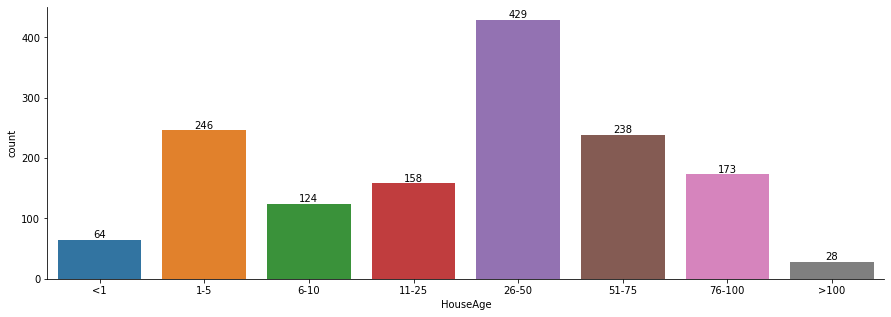

In [181]:
# binned those new features for categorizing
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']

df_train_binned = df_train.copy()


df_train_binned['HouseAge_binned'] = pd.cut(df_train['HouseAge'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 1,figsize=(15,5))
p1=sns.countplot(df_train_binned['HouseAge_binned'],ax=axes)
axes.bar_label(p1.containers[-1]) 


sns.despine()
axes.set(xlabel='HouseAge')
axes.yaxis.tick_left()



### Encoding

[[<AxesSubplot:> <AxesSubplot:>]]


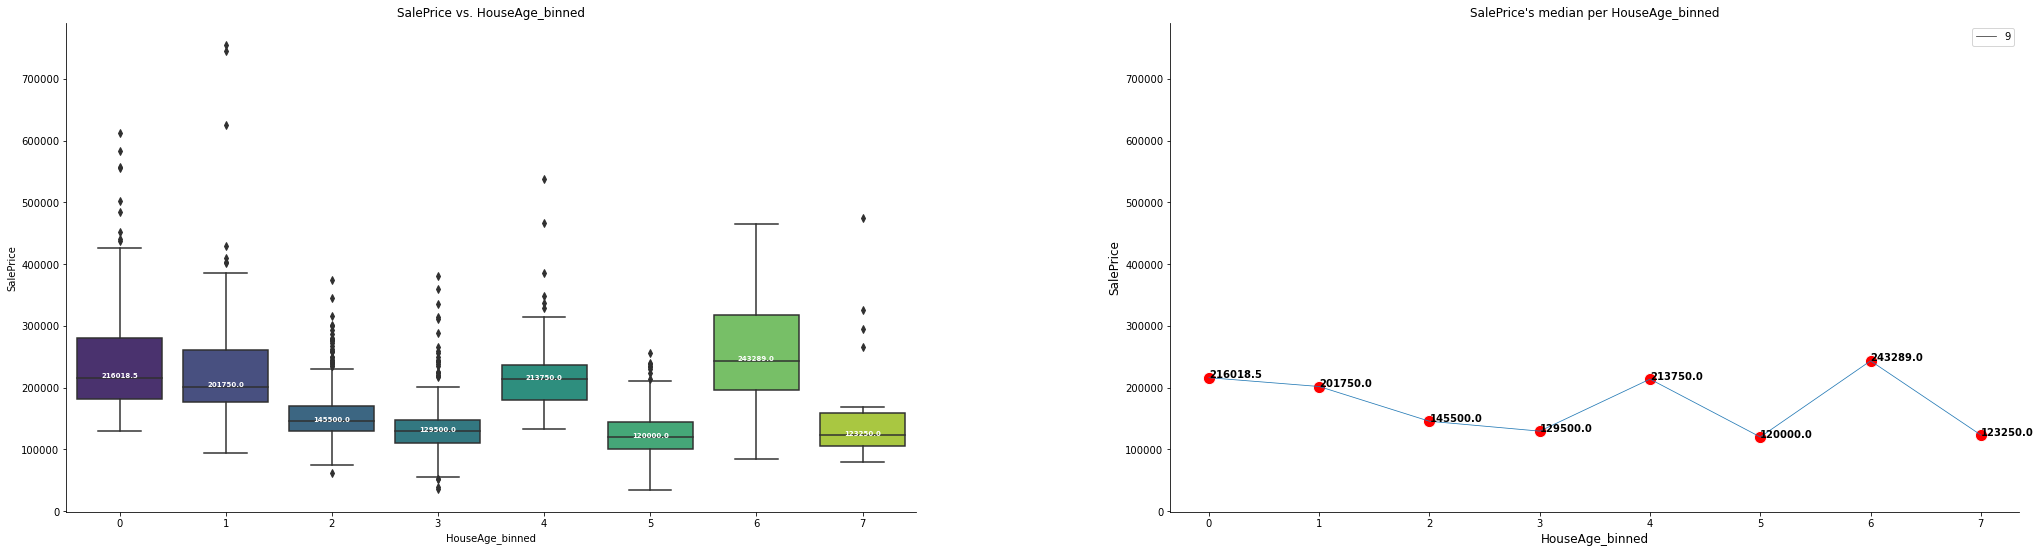

In [185]:
encoder = LabelEncoder()
df_train_binned['HouseAge_binned'] = encoder.fit_transform(df_train_binned['HouseAge_binned']).astype(str)

plot_mean_box_plot(df_train_binned, cols=['HouseAge_binned'], comp_var='SalePrice', title='')

## Multivariate

In [55]:
# sns.pairplot(data=df_train[numerical_feat], corner=True, palette='RdYlGn')

## Outliers checking

### Using Box-whisker plot
*Outliers:*
- LotFrontage > 300
- LotArea > 100,000
- BsmtFinSF1 > 5,000
- BsmtFinSF2 > 1,400
- TotalBsmtSF > 6,000
- 1stFlrSF > 4,000
- GrLivArea > 4,000
- GarageArea > 1,300
- WoodDeckSF > 800
- EnclosedPorch > 500
- SalePrice > 700,000

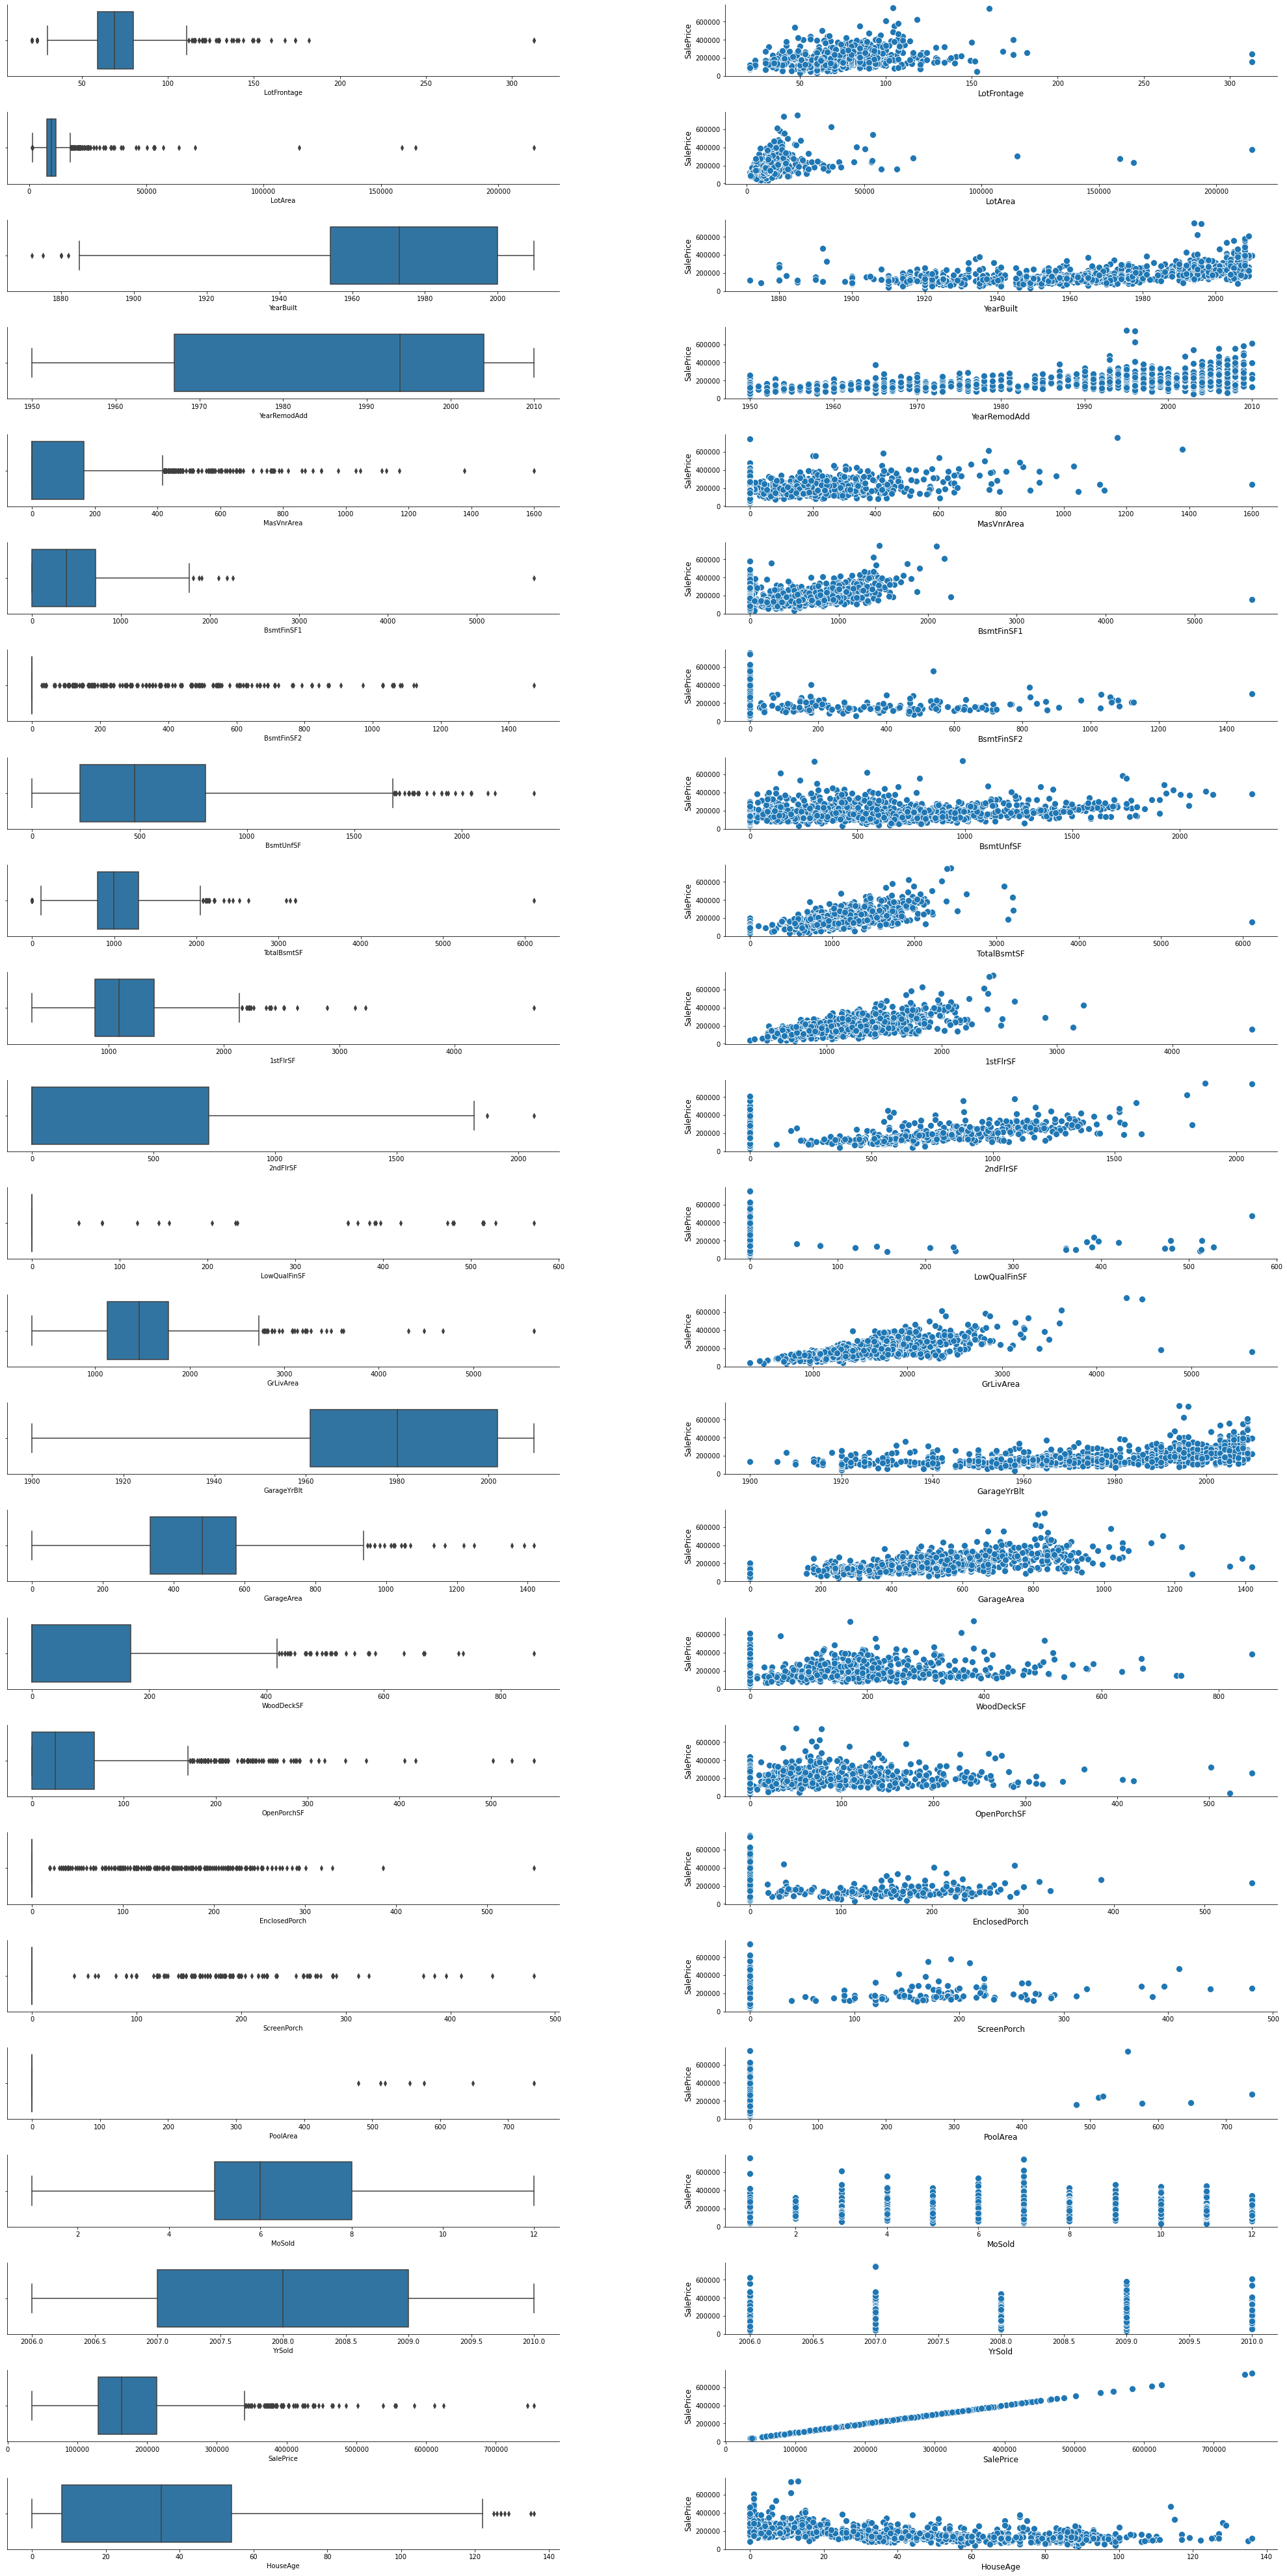

In [74]:
def plot_box_whisker_scatter(data:pd.DataFrame, comp_var:str):
    """
    Plot box-whisker and scatter plot for numerical features
    
    Parameters
    ----------
    data : DataFrame
    comp_var: str
    """
  
    figure, axs = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(35, int(len(data.columns)*3)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)

    for i, col in enumerate(data.columns):
        sns.boxplot(x=col, data=data, ax=axs[i][0])

        sns.scatterplot(x=col, y=comp_var, data=data, ax=axs[i][1], s=100)
        
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel(comp_var, fontsize=12)
        sns.despine()
        
plot_box_whisker_scatter(data=df_train[numerical_feat], comp_var='SalePrice')



### Using percentile

In [27]:
def detect_outliers_percentile(series:pd.Series):
    quartile_10, quartile_90 = series.quantile([0.1, 0.9])
 
    dropped_index = series[(series < quartile_10) | (series > quartile_90)].index
    return dropped_index

outliers_perc = detect_outliers_percentile(df_train['SalePrice'])

### Manual detecting

In [68]:
def detect_outliers_manual(data:pd.DataFrame) -> list[pd.Index]:
    indexes = data.query(
                """
                LotFrontage > 300 | \
                LotArea > 100_000 | \
                BsmtFinSF1 > 5_000 | \
                BsmtFinSF2 > 1_400 | \
                TotalBsmtSF > 6_000 | \
                GrLivArea > 4_000 | \
                GarageArea > 1_300 | \
                WoodDeckSF > 800 | \
                EnclosedPorch > 500 | \
                SalePrice > 700_000 
                """
            ).index

    return indexes 

# Data modulation 

## Missing values handling

In [80]:

df_train_modified = df_train.copy()

df_train_modified = df_train.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

In [79]:
df_train_modified.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch 3SsnPorch  ScreenPorch  PoolArea MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice DateSold  HouseAge
0   1         60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           Good     Average       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710            1            0        2        1            3            1          Gd            8        Typ          0         NaN     Attchd       2003.0          RFn          2         548         TA         TA          Y           0           61              0         0            0         0       0       2    2008       WD        Normal     208500   2008-2         5
1   2         20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story  Above Average   Very Good       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262            0            1        2        0            3            1          TA            6        Typ          1          TA     Attchd       1976.0          RFn          2         460         TA         TA          Y         298            0              0         0            0         0       0       5    2007       WD        Normal     181500   2007-5        31
2   3         60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           Good     Average       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786            1            0        2        1            3            1          Gd            6        Typ          1          TA     Attchd       2001.0          RFn          2         608         TA         TA          Y           0           42              0         0            0         0       0       9    2008       WD        Normal     223500   2008-9         7
3   4         70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           Good     Average       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717            1   

## Duplicates handling

In [81]:
def remove_duplicates(data:pd.DataFrame):
    """ Remove duplicates values if exist"""
    print(f"Duplicates count before droping:{data.duplicated().sum()}")
    data.drop_duplicates(inplace=True)
    print(f"Duplicates count after droping:{data.duplicated().sum()}")
    print(f"Data dimension{data.shape}")
    
remove_duplicates(df_train)

Duplicates count before droping:0
Duplicates count after droping:0
Data dimension(1460, 83)


## Outliers handling

In [82]:
def remove_outliers(data:pd.DataFrame, indexes:list[pd.Index]):
    """Remove outliers for the given indexes"""
    return data.drop(index=indexes)

df_train_modified = remove_outliers(data=df_train, indexes=detect_outliers_manual(df_train))

# Train/Test split

In [61]:
X_train, y_train = df_train_modified.drop(columns=['price']), df_train_modified['price']
X_test, y_test = df_test.drop(columns=['price']), df_test['price']

# Feature Engineering

## Features selection

In [64]:
# Remove some correlated features
corr_features = ['sqft_living15', 'sqft_above', 'sqft_lot15'] 
# numerical_feat = numerical_feat.drop(corr_features)
# X_train = X_train.drop(columns=corr_features)
# X_test = X_test.drop(columns=corr_features)


In [65]:
@dataclass
class TestResult:
    """class for storing test results"""
    specs: list[str]
    scores: list[Union[int, float]]
    res: pd.DataFrame = field(init=False, repr=False)

    def __post_init__(self):
        # Grouping results in DataFrame
        self.res = pd.DataFrame()
        self.res['Specs'] = self.specs
        self.res['Score'] = self.scores

@dataclass
class FeatureRank:
    """
    class for holding feature ranking
    """

    func: Callable[[pd.DataFrame, pd.DataFrame], list[float]]
    X: pd.DataFrame
    y: pd.DataFrame
    test_result: TestResult = field(init=False)


    
    def __post_init__(self):
        """Call it after initialize a new instance"""
        
        # Calculate feature ranking
        score_vals, feats = self.func(self.X, self.y)
        
        # Create test result
        ranks = score_vals[0] if(len(score_vals)==2) else score_vals

        # Normalize ranks
        ranks = (ranks - ranks.min()) / (ranks.max() - ranks.min())

        self.test_result = TestResult(feats, ranks)

        # Change the index of the DataFrame
        self.test_result.res.index = [self.X.columns.get_loc(spec) for spec in self.test_result.res['Specs']]
    
    def get_largest_score(self, n:Union[int, str] = 'auto') -> list[str]:
        """Get the largest n scores"""
        if(isinstance(n, str) and n=='auto'):
            n = self.test_result.res.shape[0]
        
        return self.test_result.res.nlargest(n, columns=['Score'])['Specs'].values

    def feat_imp_plot(self, title, sorting=False):
        """Plot feature importance as bar plot"""

        # Take copy of result to avoid modifying on original result
        result = self.test_result.res.copy()
        
        if(sorting):
            result = result.sort_values(by='Score', ascending=False)
            
        fig = plt.figure(figsize=(20,8))
        ax  = fig.add_subplot()
        axs = sns.barplot(x='Specs', y='Score', data=result, palette = 'viridis', ax=ax)

        # Add rank values as annotation to bars 
        for p in axs.patches:
            axs.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()))
        plt.box(False)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('\n Features')
        ax.set_ylabel('Importance \n')
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)

        return ax

        

### Correlation

<AxesSubplot:title={'center':'Correlation - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

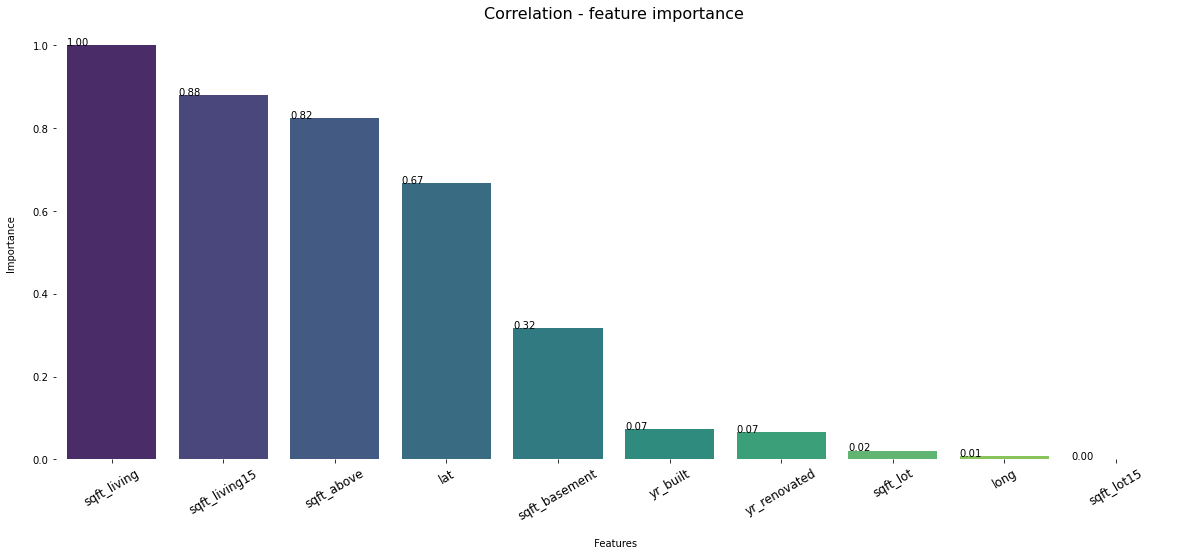

In [66]:
def corr_score(X:pd.DataFrame, y:pd.Series):
    """Calculate target-vars correlation """
    
    # Get entire data
    data = pd.concat([X, y], axis=1)

    # Change data columns after combination
    data.columns = X.columns.to_list() + [y.name]
    
    # Calculate the correlation matrix
    corr_mat = data.corr(method='spearman')

    # get correlated values with target
    target_corr_values = corr_mat['price'].to_numpy()[:-1]

    
    return target_corr_values, corr_mat['price'].index[:-1]

corr_rank = FeatureRank(corr_score, X_train, y_train)
corr_rank.feat_imp_plot(title='Correlation - feature importance', sorting=True)

### Feature importance - Entropy

<AxesSubplot:title={'center':'Mutual Info - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

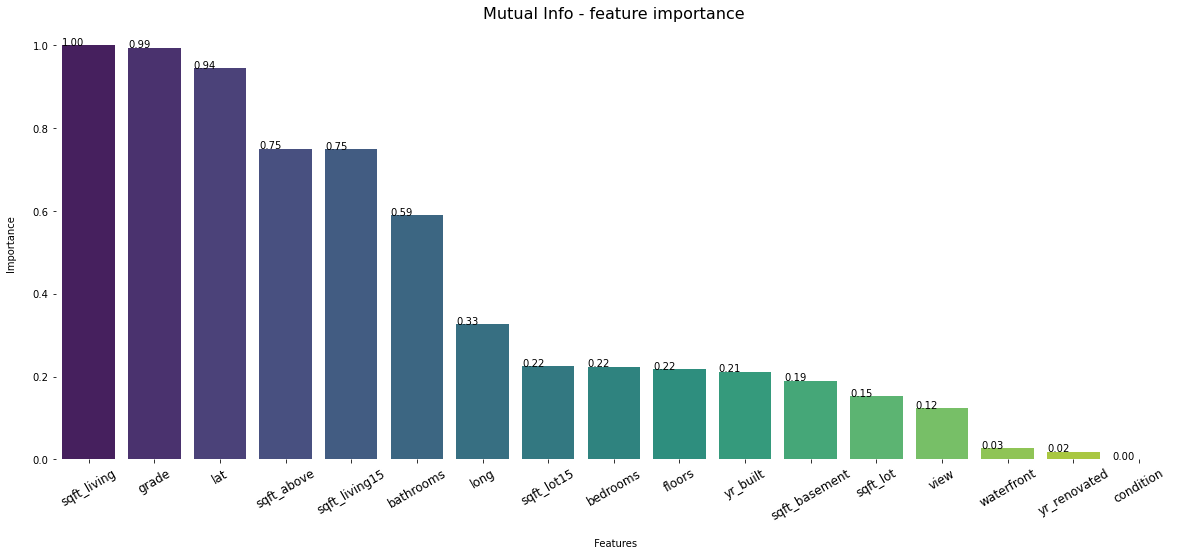

In [33]:
def mutual_info_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    mutual_info = mutual_info_regression(X, y)
    return mutual_info, X.columns

mutual_info_rank = FeatureRank(mutual_info_score, X_train, y_train)
mutual_info_rank.feat_imp_plot('Mutual Info - feature importance', sorting=True)

### Tree-Based

<AxesSubplot:title={'center':'Tree-Based - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

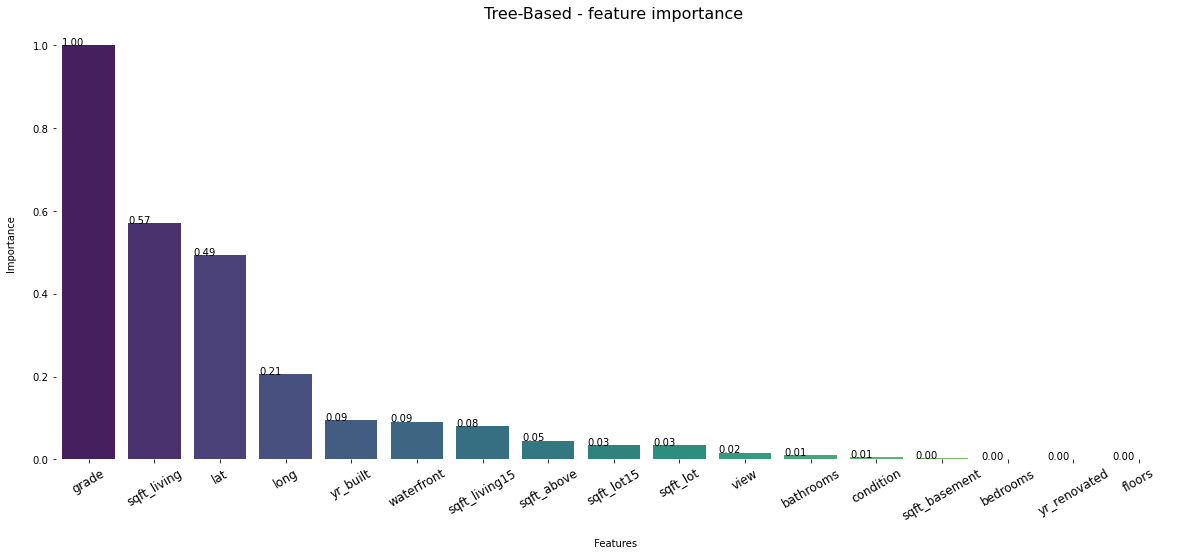

In [34]:
def tree_based_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    dt_model_selector = DecisionTreeRegressor()
    dt_model_selector.fit(X, y)
    return dt_model_selector.feature_importances_, X.columns

tree_based_rank = FeatureRank(tree_based_score, X_train, y_train)
tree_based_rank.feat_imp_plot('Tree-Based - feature importance', sorting=True)

## Features Transformation
- Since the goal is to use **Linear Regression** which is considered as **Gradient-based** algorithm.Then, numerical variables should be **Normally** distributed.
- **Min-Max** scaler and **Standard** scaler are very sensitive to the *presence* of outliers.


In [35]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

### QuantileTransformer

In [36]:
rng = np.random.RandomState(304)

# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt_scaler = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)

X_train_norm.iloc[:,:] = qt_scaler.fit_transform(X_train_norm.iloc[:,:])
X_test_norm.iloc[:,:] = qt_scaler.transform(X_test_norm.iloc[:,:])

y_train_norm = pd.Series(qt_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel(), name='price')
y_test_norm = pd.Series(qt_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel(), name='price')

### Min-Max Scaler
- It rescales the data to a range between 0 and 1.

In [67]:
# Normalize all features because categorical feature won't be affected
norm_scaler = MinMaxScaler()

X_train_norm.iloc[:,:] = norm_scaler.fit_transform(X_train_norm.iloc[:,:])
X_test_norm.iloc[:,:] = norm_scaler.transform(X_test_norm.iloc[:,:])

y_train_norm = pd.Series(norm_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel(), name='price')
y_test_norm = pd.Series(norm_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel(), name='price')

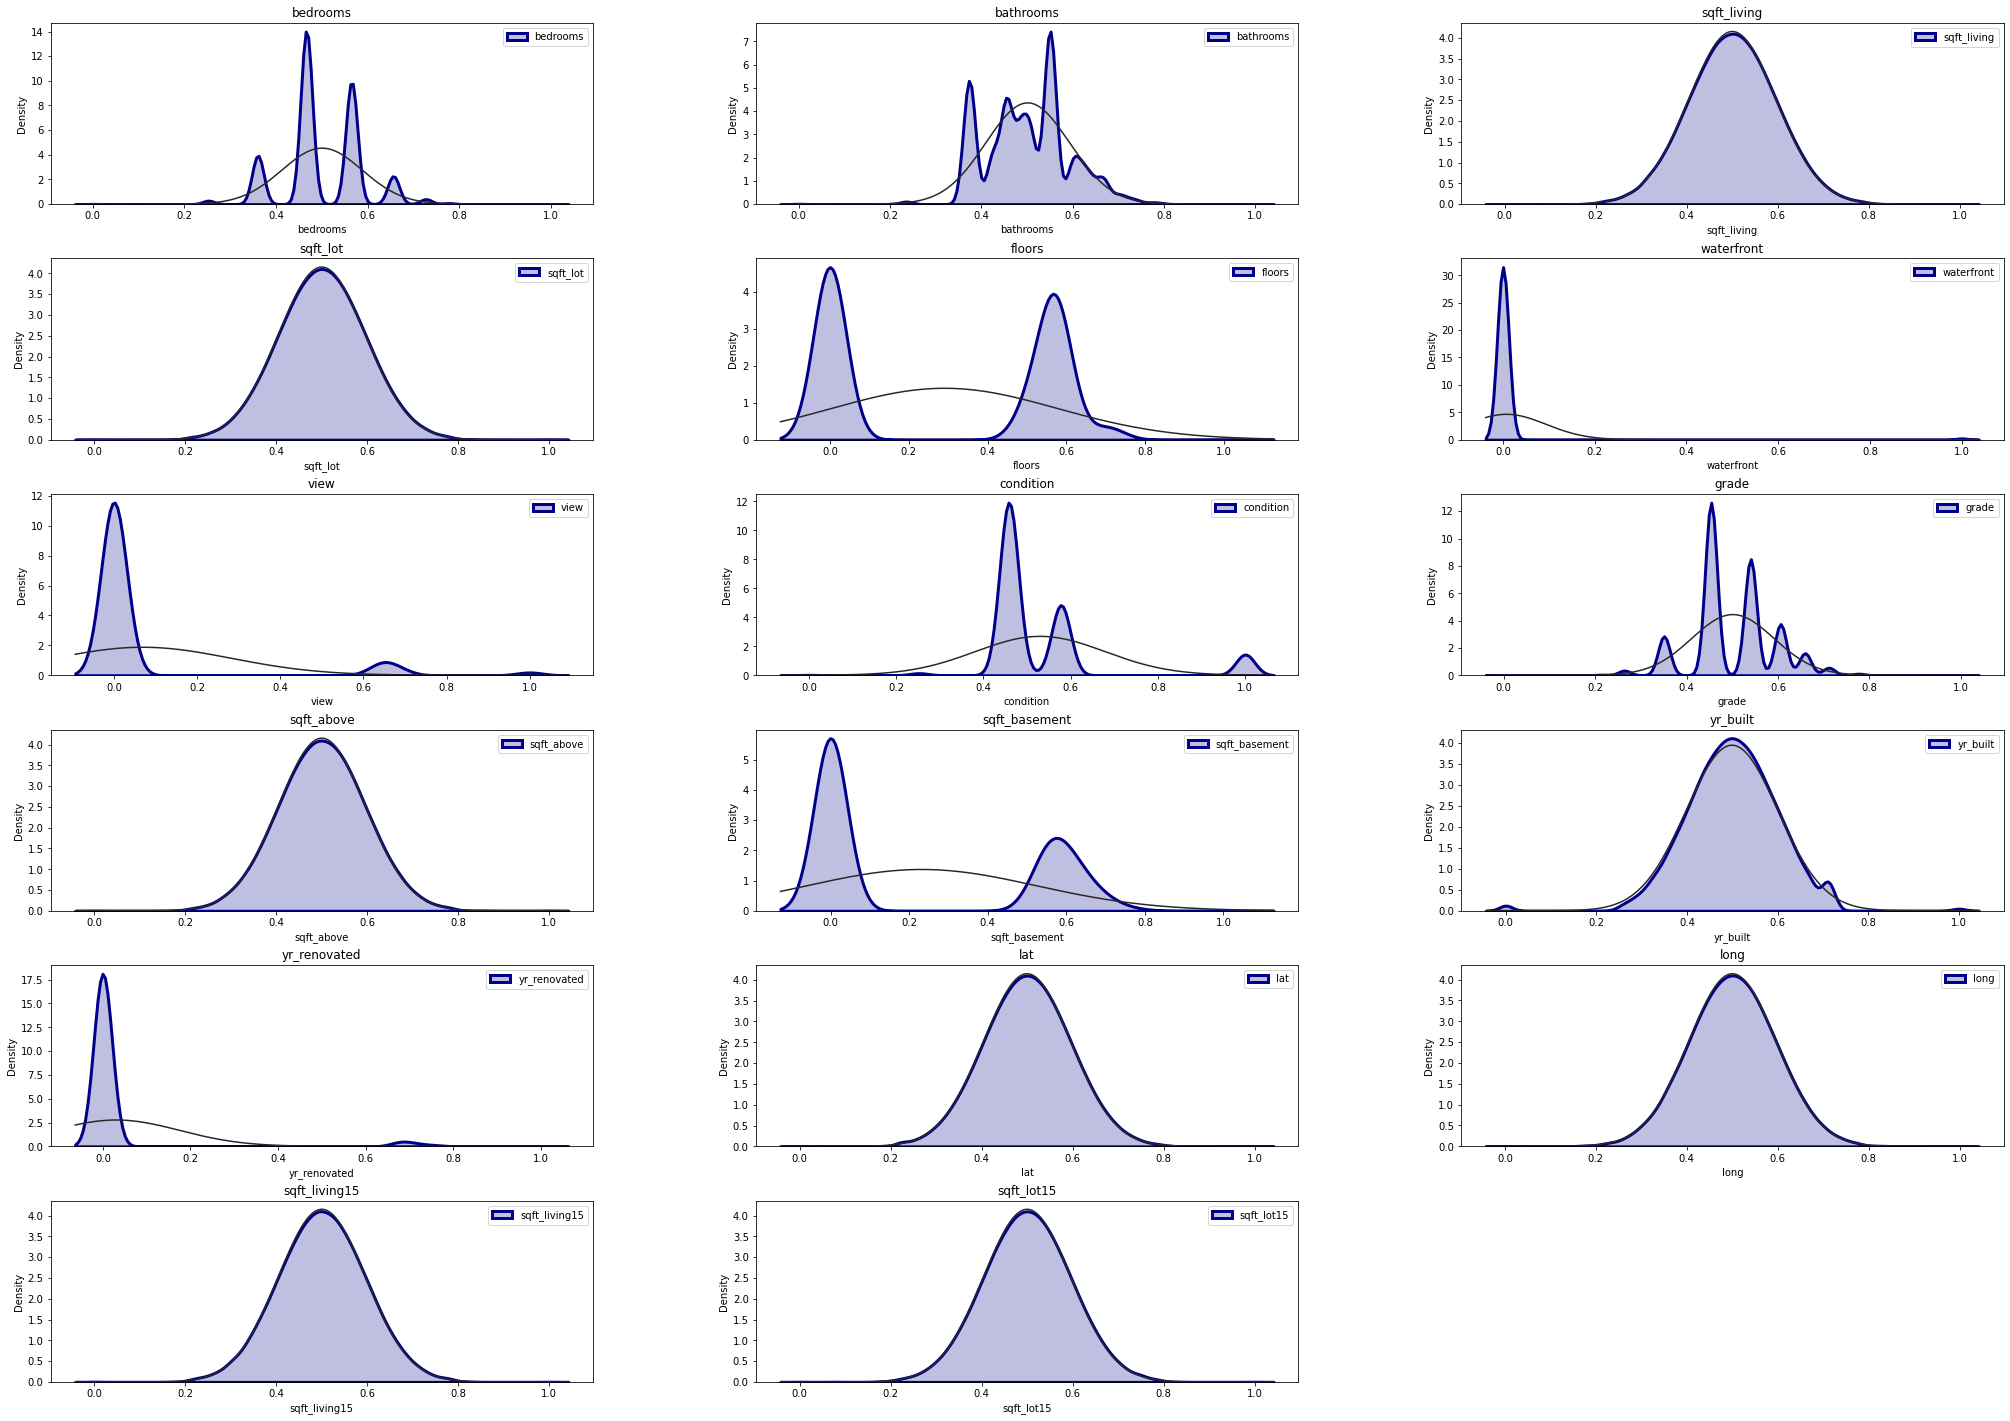

In [69]:
plot_kde(X_train_norm)